# WINE QUALITY AND FEATURE IMPORTANCE

Import necessary libraries

In [15]:
import pandas as pd

Loading the dataset

In [16]:
url = 'sample_data/redwine'
data = pd.read_csv(url)
# Displaying first 10 rows
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Data Exploration

In [17]:
# Check for missing values
print(data.isnull().sum())
# Display statistical summary
print(data.describe())
# Convert non-numeric columns to numeric if possible
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col])
    except ValueError:
        print(f"Could not convert column {col} to numeric")

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dio

## Data Visualization

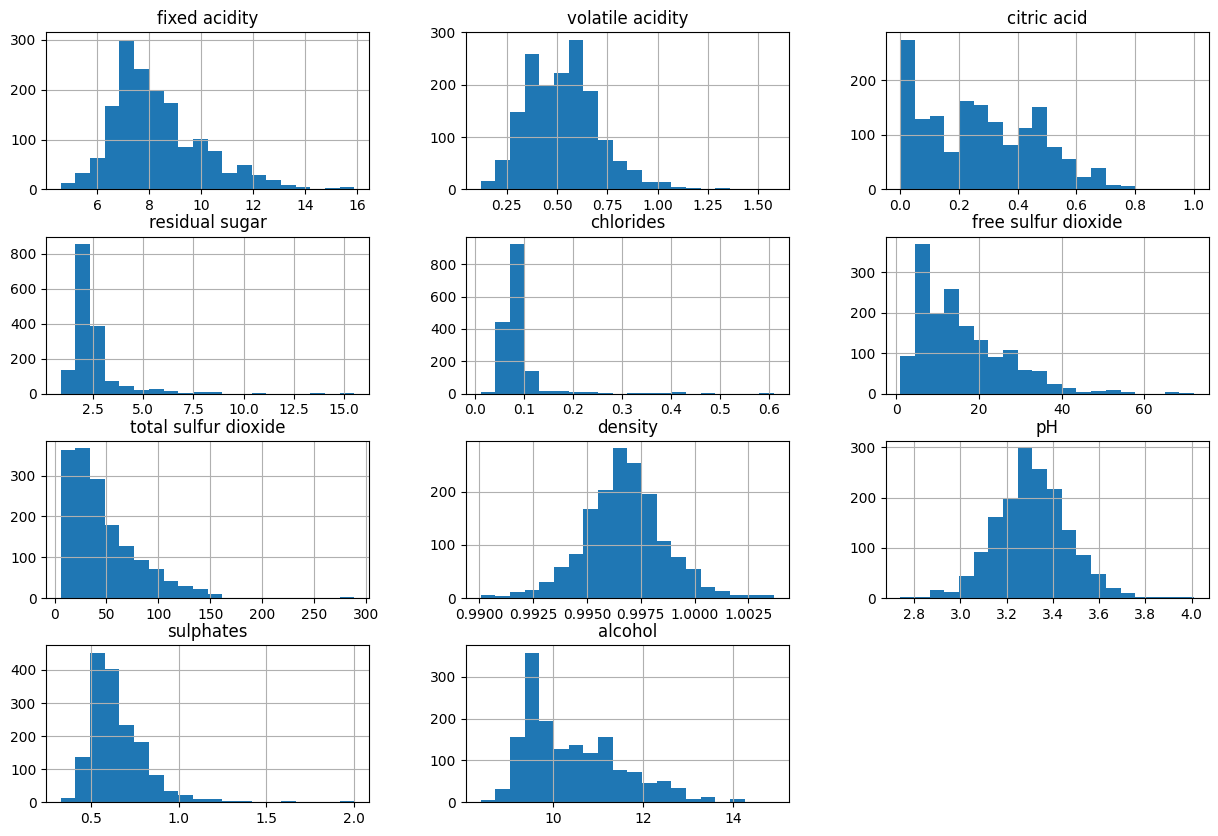

In [18]:
# Feature Distribution
import matplotlib.pyplot as plt
import seaborn as sns
# Ploting histogram for all features
data.hist(bins=20,  figsize=(15,10))
plt.show()

Cleaning data, removing non numeric values, replacing with correct numeric values

In [19]:
# Check for non-numeric values in each column
for col in data.columns:
    non_numeric = data[col].apply(lambda x: isinstance(x, str))
    if non_numeric.any():
        print(f"Non-numeric values found in column {col}:")
        print(data[col][non_numeric].unique())

Non-numeric values found in column quality:
['5' '6' '7' '4' '8' '3' '6x']


In [20]:
# Replace or remove non-numeric values
data['quality'] = data['quality'].replace('6x', 6.0)

# Convert columns to numeric and handle non-numeric values
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values (e.g., fill with mean or drop)
data.fillna(data.mean(), inplace=True)


Correlation Heatmap

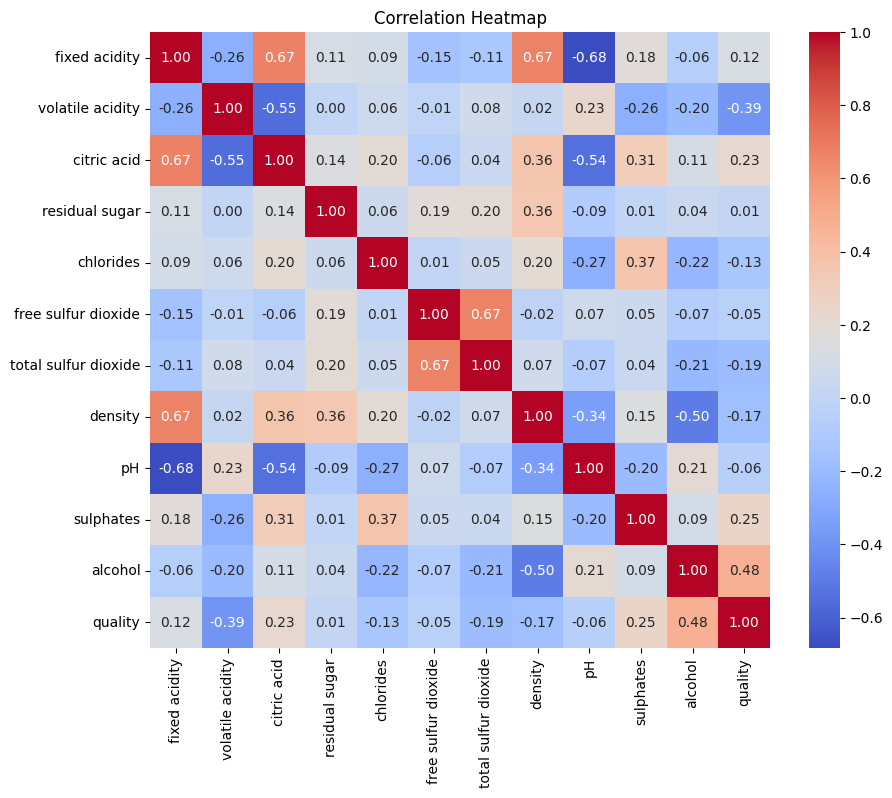

In [21]:
# # Correlation matrix
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Box Plot

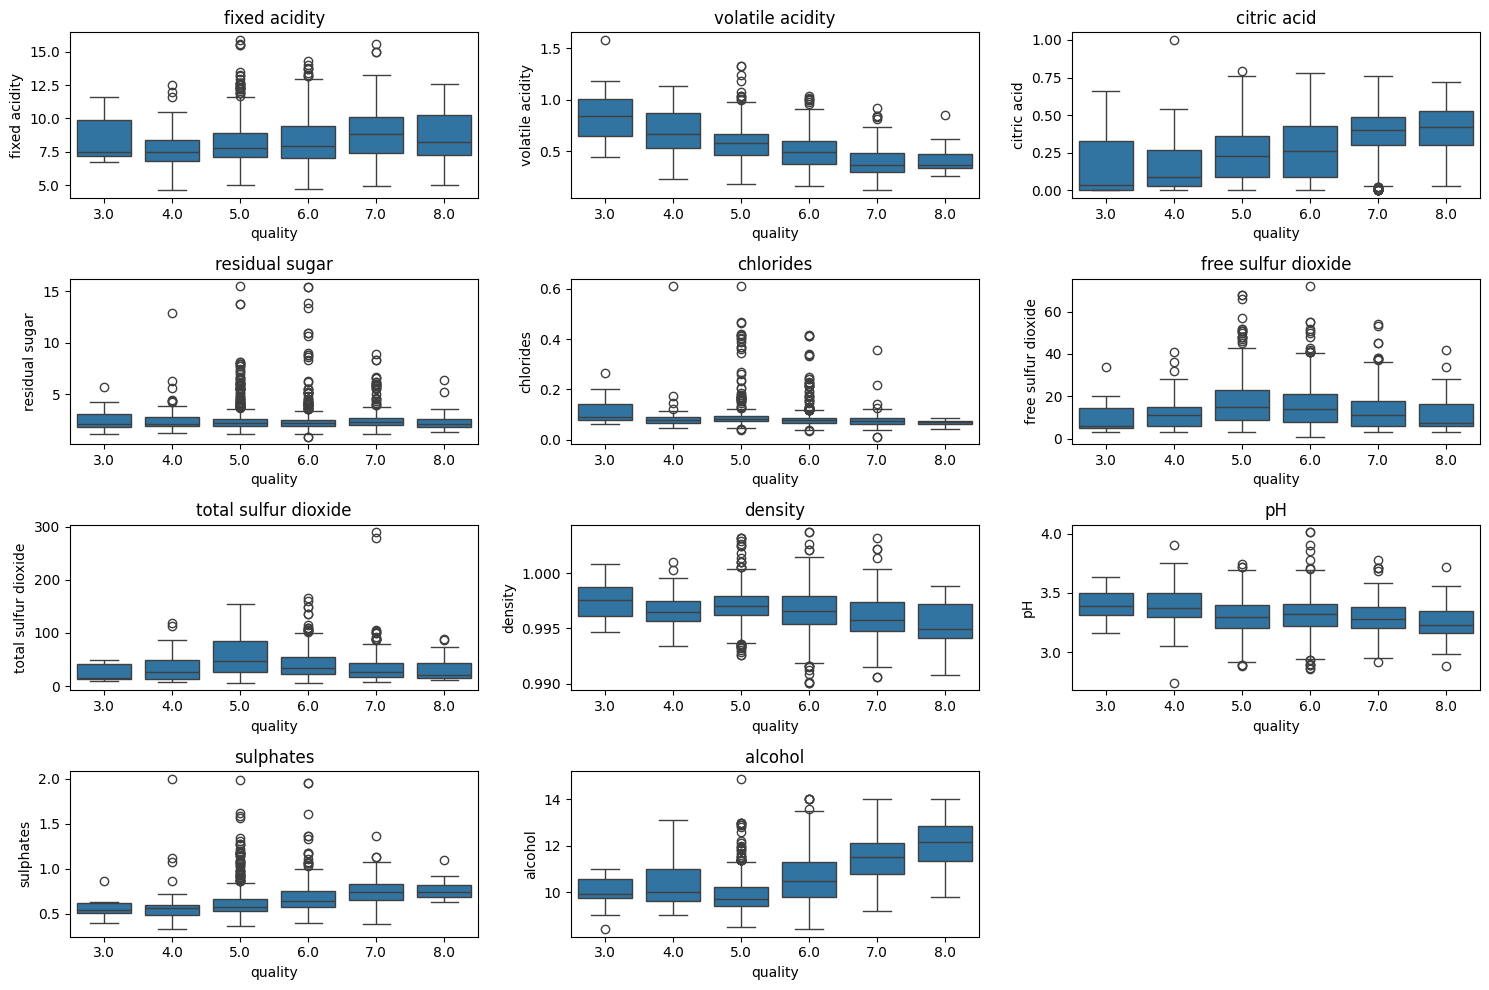

In [22]:
# Plot box plots for each feature against the quality
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='quality', y=column, data=data)
    plt.title(column)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [23]:
# Binarize the quality variable
data['quality'] = (data['quality'] >= 7).astype(int)

# Display the class distribution
print(data['quality'].value_counts())


quality
0    1382
1     217
Name: count, dtype: int64


Split the data

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


## Decision Tree Classifier

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Accuracy: 0.859375
Confusion Matrix:
[[251  22]
 [ 23  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       273
           1       0.52      0.51      0.52        47

    accuracy                           0.86       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.86      0.86      0.86       320

ROC AUC Score: 0.7150261086431299


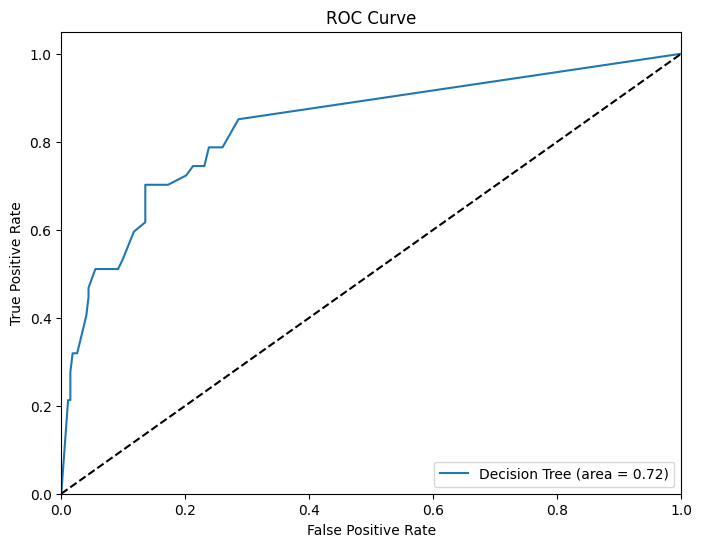

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Initialize the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the decision tree with the best parameters
best_dt = grid_search.best_estimator_

# Predict on the test set
y_pred_dt = best_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy_dt}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Classification Report:")
print(class_report_dt)
print(f"ROC AUC Score: {roc_auc_dt}")

# Plot ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, best_dt.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Which features are important?

                 Feature  Importance
10               alcohol    0.307039
9              sulphates    0.166207
1       volatile acidity    0.145788
5    free sulfur dioxide    0.107560
6   total sulfur dioxide    0.101268
0          fixed acidity    0.060715
8                     pH    0.034950
2            citric acid    0.021804
3         residual sugar    0.020195
7                density    0.020021
4              chlorides    0.014454


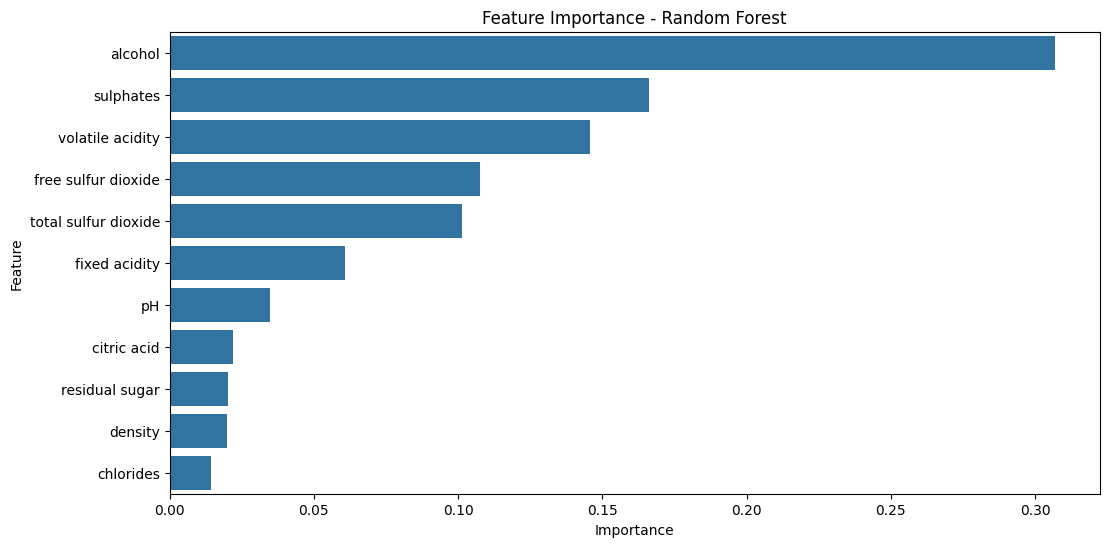

In [26]:
# Extract feature importance
importances_rf = best_dt.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

## Result

* Features like ***alcohol, sulphates ,and volatile acidity*** are more likely to play important role in deciding the quality of the wine.
* ROC AUC score suggests that model predicts well between threshold 7 and 8.

Scope:
* Model is trained only on Decision Tree Classifier, to check the further imporovement there is a room for implementing model using different algorithms like random forest Classifier, Gradient Boosting Classifier.
* Employing different classifier may improve AUC score and Recall.

